In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# ML methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## 1. Load and summarize your data

In [2]:
# Load dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
dataset = read_csv(url)
# head
print(dataset.head(20))

    Survived  Pclass                                               Name  \
0          0       3                             Mr. Owen Harris Braund   
1          1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2          1       3                              Miss. Laina Heikkinen   
3          1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4          0       3                            Mr. William Henry Allen   
5          0       3                                    Mr. James Moran   
6          0       1                             Mr. Timothy J McCarthy   
7          0       3                      Master. Gosta Leonard Palsson   
8          1       3   Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson   
9          1       2                 Mrs. Nicholas (Adele Achem) Nasser   
10         1       3                     Miss. Marguerite Rut Sandstrom   
11         1       1                            Miss. Elizabeth Bonnell   
12         0       3     

In [3]:
dataset.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [5]:
# class distribution
print(dataset.groupby('Survived').size())

Survived
0    545
1    342
dtype: int64


## 2. Visualization of the Data

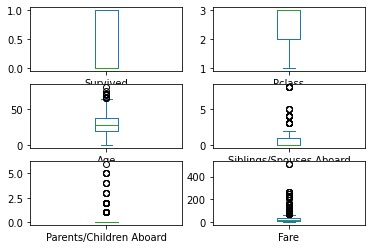

In [6]:
dataset.plot(kind='box', subplots=True, layout=(3, 2), sharex=False, sharey=False)
plt.show()

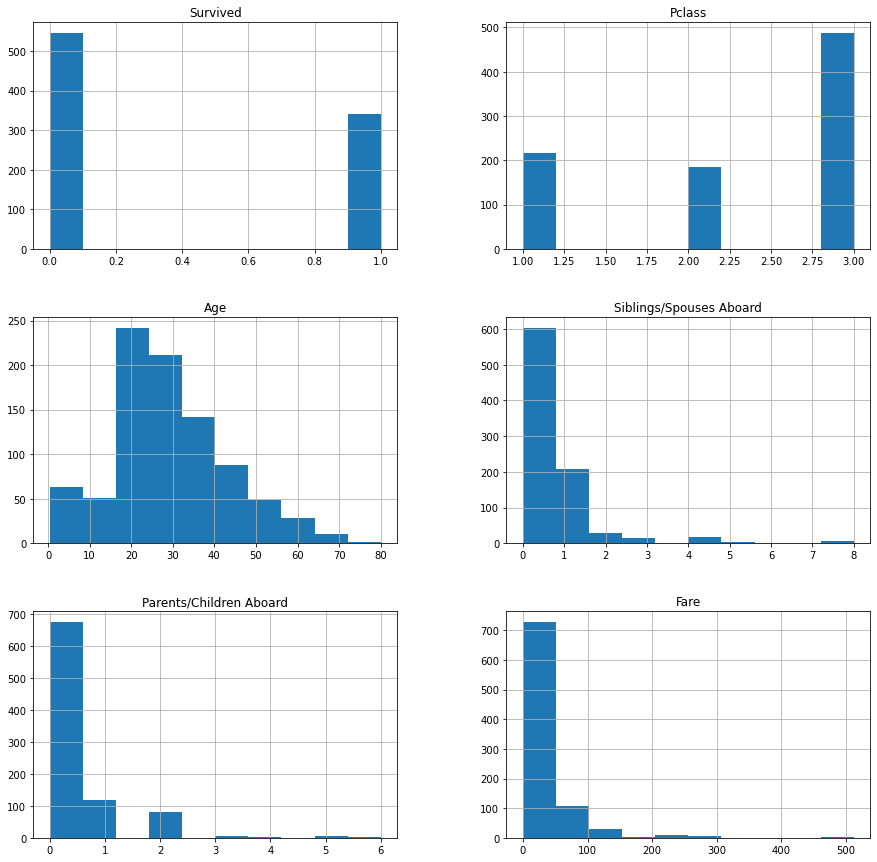

In [7]:
dataset.hist(figsize=[15,15])
plt.show()

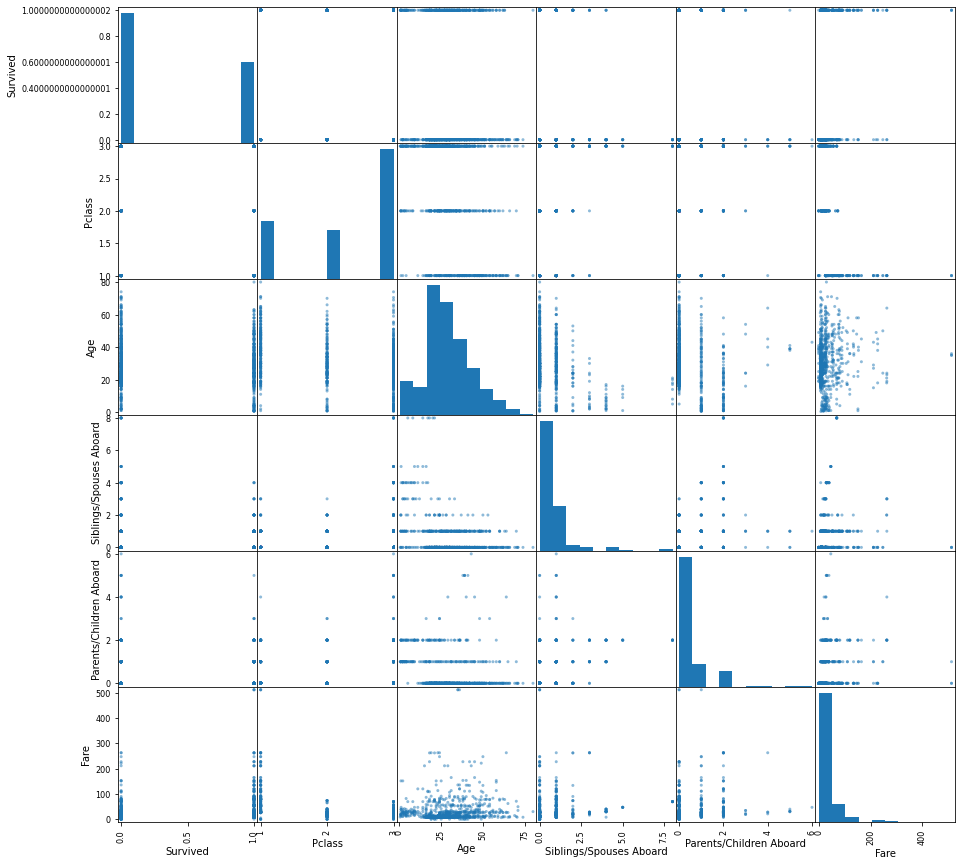

In [8]:
scatter_matrix(dataset, figsize=[15,15])
plt.show()

## 3. Preparing Data

>- Extracting dependent and independent values

In [9]:
# remove unnecessary columns
dataset = dataset.drop('Name', axis = 1)
dataset = dataset.drop('Siblings/Spouses Aboard', axis = 1)
dataset = dataset.drop('Parents/Children Aboard', axis = 1)

# convert string into integer for the 'sex'in order to calculate
#0 = male   / 1=female

dataset.loc[dataset['Sex'] == 'male', 'Sex'] = 0
dataset.loc[dataset['Sex'] == 'female', 'Sex'] = 1
dataset.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


In [10]:
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

if isinstance(X,pd.core.frame.DataFrame): print('Our data are is the form of pandas DataFrame.')

print("Sample from the 1st row:")
X.iloc[0]

Our data are is the form of pandas DataFrame.
Sample from the 1st row:


Pclass       3
Sex          0
Age       22.0
Fare      7.25
Name: 0, dtype: object

## Remove duplicate values

In [11]:
dataset.drop_duplicates()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500
...,...,...,...,...,...
881,0,3,1,39.0,29.1250
883,1,1,1,19.0,30.0000
884,0,3,1,7.0,23.4500
885,1,1,0,26.0,30.0000


## Test / Validation Split

In [12]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

print("Features (independent variables):")
print(X_train)

print("")

print("Corresponding labels (dependent variables):")
print(Y_train)

Features (independent variables):
     Pclass Sex   Age      Fare
277       3   1  35.0   20.2500
726       1   1  29.0  211.3375
482       3   1   8.0   25.4667
560       3   0  40.0    8.0500
218       2   0  30.0   10.5000
..      ...  ..   ...       ...
715       3   0  33.0    7.7750
767       3   0  48.0    7.8542
72        3   0  26.0   14.4542
235       2   0  44.0   26.0000
37        3   0  21.0    8.0500

[709 rows x 4 columns]

Corresponding labels (dependent variables):
277    1
726    1
482    0
560    0
218    0
      ..
715    0
767    0
72     0
235    0
37     0
Name: Survived, Length: 709, dtype: int64


## 4. Building models and models evaluation technique

In [13]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC(gamma='auto')))

In [14]:
names = []
results = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	names.append(name)
	results.append(cv_result)
	print('%s: %f (%f)' % (name, cv_result.mean(), cv_result.std()))


LR: 0.799718 (0.059013)
CART: 0.765734 (0.062783)
NB: 0.781348 (0.057260)
LDA: 0.795493 (0.058808)
SVM: 0.678390 (0.033487)


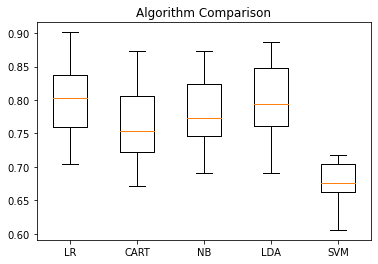

In [15]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

## Select the best method

C:\Anaconda\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


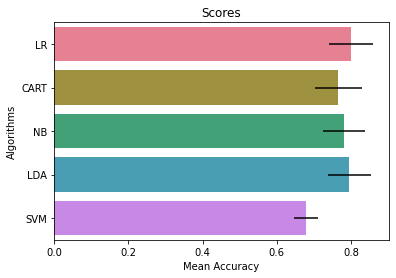

In [16]:
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

for cv_result in results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms": names
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("Scores")

### Algorithm Tuning

Lets try to tune the KNN model with using of a grid search method.

In [17]:
from sklearn.model_selection import GridSearchCV


knn_model = KNeighborsClassifier()

# parameters that we will try to tune
params_knn = {'n_neighbors': range(2, 10),
                'weights': ('uniform', 'distance', ), },

param_search = GridSearchCV( estimator=knn_model, param_grid=params_knn,
                verbose=1)
                
param_search.fit(X_train, Y_train)

best_score = param_search.best_score_
best_params = param_search.best_params_

print(f'Best accuracy: {best_score} was obtained with parameters: {best_params}')


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best accuracy: 0.7010288682449305 was obtained with parameters: {'n_neighbors': 5, 'weights': 'uniform'}


## 6. Make and evaluate predictions

We can fit the model on the entire training dataset and make predictions on the validation dataset.

In [18]:
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.7865168539325843
[[89 17]
 [21 51]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       106
           1       0.75      0.71      0.73        72

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178



##  Saving the Model

In [19]:
import pickle

# save the model to disk
filename = 'titanic_model.sav'
pickle.dump(model, open(filename, 'wb'))

## Using saved model

In [20]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_validation, Y_validation)
print(result)

0.7865168539325843
